In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, fbeta_score
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from catboost import CatBoostRegressor

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_hist_gradient_boosting
from pandas import read_csv
import IPython
from IPython.display import display
%matplotlib inline

In [2]:
df = read_csv('AirQualityUCI.csv')
df.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [3]:
df.drop(['Time'], axis=1, inplace=True)
df.head()

,Date,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9357 non-null   object 
 1   CO_GT         9357 non-null   float64
 2   PT08_S1_CO    9357 non-null   int64  
 3   NMHC_GT       9357 non-null   int64  
 4   C6H6_GT       9357 non-null   float64
 5   PT08_S2_NMHC  9357 non-null   int64  
 6   Nox_GT        9357 non-null   int64  
 7   PT08_S3_Nox   9357 non-null   int64  
 8   NO2_GT        9357 non-null   int64  
 9   PT08_S4_NO2   9357 non-null   int64  
 10  PT08_S5_O3    9357 non-null   int64  
 11  T             9357 non-null   float64
 12  RH            9357 non-null   float64
 13  AH            9357 non-null   float64
 14  CO_level      9357 non-null   object 
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

Date            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64

In [6]:
df.dtypes

Date             object
CO_GT           float64
PT08_S1_CO        int64
NMHC_GT           int64
C6H6_GT         float64
PT08_S2_NMHC      int64
Nox_GT            int64
PT08_S3_Nox       int64
NO2_GT            int64
PT08_S4_NO2       int64
PT08_S5_O3        int64
T               float64
RH              float64
AH              float64
CO_level         object
dtype: object

In [7]:
df['CO_level']

0       Very High
1       Very High
2       Very High
3       Very High
4       Very High
          ...    
9352     Very low
9353     Very low
9354     Very low
9355     Very low
9356     Very low
Name: CO_level, Length: 9357, dtype: object

In [8]:
df['CO_level'].value_counts()

CO_level
High         5801
Very low     1683
Low          1556
Moderate      305
Very High      12
Name: count, dtype: int64

In [9]:
df.replace({'CO_level':{'Very low': 0, 'Low': 1, 'Moderate': 2, 'High': 3, 'Very High': 4}}, inplace=True)
df.head()

,Date,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,4
1,11/23/2004,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,4
2,11/17/2004,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,4
3,11/23/2004,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,4
4,11/26/2004,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,4


In [10]:
df.dtypes

Date             object
CO_GT           float64
PT08_S1_CO        int64
NMHC_GT           int64
C6H6_GT         float64
PT08_S2_NMHC      int64
Nox_GT            int64
PT08_S3_Nox       int64
NO2_GT            int64
PT08_S4_NO2       int64
PT08_S5_O3        int64
T               float64
RH              float64
AH              float64
CO_level          int64
dtype: object

In [11]:
df['CO_level'] = df['CO_level'].astype(float)

In [12]:
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [13]:
#df['Date'] = df['Date'].astype(int) // 10**9  # Convert nanoseconds to seconds

# Now, you can convert Unix timestamps to floats if needed
#df['Date'] = df['Date'].astype(float)

In [14]:
df.drop(['Date'], axis=1, inplace=True)

In [15]:
#df['Date'] = df['Date'].astype(float)

In [16]:
df.dtypes

CO_GT           float64
PT08_S1_CO        int64
NMHC_GT           int64
C6H6_GT         float64
PT08_S2_NMHC      int64
Nox_GT            int64
PT08_S3_Nox       int64
NO2_GT            int64
PT08_S4_NO2       int64
PT08_S5_O3        int64
T               float64
RH              float64
AH              float64
CO_level        float64
dtype: object

In [17]:
df.corr()['CO_level']

CO_GT           0.806972
PT08_S1_CO      0.202281
NMHC_GT         0.157228
C6H6_GT        -0.006655
PT08_S2_NMHC    0.250478
Nox_GT          0.627592
PT08_S3_Nox    -0.340432
NO2_GT          0.691575
PT08_S4_NO2     0.068043
PT08_S5_O3      0.295170
T              -0.074737
RH             -0.080428
AH             -0.067333
CO_level        1.000000
Name: CO_level, dtype: float64

In [18]:
cor = df.corr()
cor_feature = cor['CO_level'].sort_values(ascending = False).to_frame()
cor_feature.style.background_gradient(cmap='BrBG_r')

,CO_level
CO_level,1.000000
CO_GT,0.806972
NO2_GT,0.691575
Nox_GT,0.627592
PT08_S5_O3,0.295170
PT08_S2_NMHC,0.250478
PT08_S1_CO,0.202281
NMHC_GT,0.157228
PT08_S4_NO2,0.068043
C6H6_GT,-0.006655


<Axes: xlabel='CO_level', ylabel='Count'>

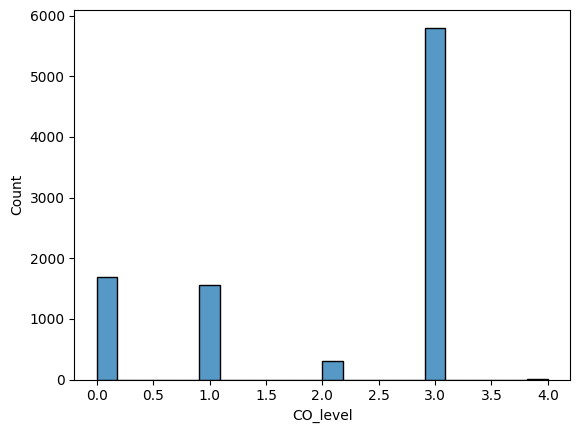

In [19]:
sns.histplot(df['CO_level'])

<Axes: ylabel='Density'>

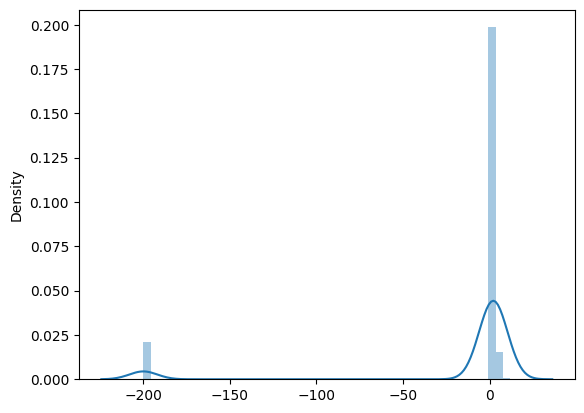

In [20]:
sns.distplot(df[['CO_level', 'CO_GT']])

In [21]:
df.corr().style.background_gradient(cmap='GnBu')

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
CO_GT,1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892,0.806972
PT08_S1_CO,0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903,0.202281
NMHC_GT,0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500,0.157228
C6H6_GT,-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555,-0.006655
PT08_S2_NMHC,0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572,0.250478
Nox_GT,0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847,0.627592
PT08_S3_Nox,-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618,-0.340432
NO2_GT,0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440,0.691575
PT08_S4_NO2,-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913,0.068043
PT08_S5_O3,0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467,0.295170


In [22]:
X = df.drop(['CO_level'], axis=1)

X.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741
1,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324
2,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244
3,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936
4,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979


In [23]:
y = df['CO_level']
y.head()

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: CO_level, dtype: float64

In [24]:
columns=X.columns
X=StandardScaler().fit_transform(X)
X=pd.DataFrame(data = X,columns = columns)
X.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,0.593763,2.907720,-0.29267,1.177783,3.170778,4.740822,-1.459704,1.275084,2.505474,2.991654,0.060686,0.687605,0.202996
1,0.588612,2.634840,-0.29267,1.148782,3.106510,4.620397,-1.428646,1.038740,2.323533,2.761851,0.039853,0.716895,0.201927
2,0.571871,2.283128,-0.29267,1.107698,3.007186,2.250729,-1.363424,1.054497,1.805538,3.232400,0.090777,0.259983,0.196590
3,0.571871,2.828888,-0.29267,1.151199,3.109431,4.663128,-1.469021,1.330231,2.449822,3.087952,0.079203,0.646601,0.203497
4,0.570583,2.750056,-0.29267,1.047279,2.869885,4.740822,-1.391376,1.550819,2.026007,3.260852,0.132443,0.455244,0.203607


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=123)

Feature Transformation
Feature transformation is a mathematical transformation in which we apply a mathematical formula to data and transform 
the values which are useful for our further analysis.

In [26]:
polynomialfeatures=PolynomialFeatures()
X_train=polynomialfeatures.fit_transform(X_train)
X_test=polynomialfeatures.transform(X_test)

# Model(ADA BOOST)
* AdaBoost is one of the initial boosting ensemble algorithms to be adapted in solving studies. 
* It helps by combine multiple 'weak classifiers' into a single 'strong classifier.' 
* The core concept of the algorithm is to fit a sequence of weak learners on repeatedly modified versions of the data. 
* The predictions from all the Weak learners are then combined through a weighted majority vote or sum to produce the outcome/Prediction.

In [27]:
# Model Initialization
model=AdaBoostRegressor()
model.fit(X_train,Y_train)

AdaBoostRegressor()

In [28]:
# Metrics
y_pred=model.predict(X_test)
print(f" ======== ADABOOST BOOSTING REGRESSOR =======")
print(f"Acuracy : {model.score(X_test,Y_test)}")
print('R2 Score: {:.2f}'.format(r2_score(Y_test,y_pred)))
print('Mean Absolute Error {:.2f}'.format(mean_absolute_error(Y_test,y_pred)))
print('Mean Squared Error {:.2f}'.format(mean_squared_error(Y_test,y_pred)))


 ======== ADABOOST BOOSTING REGRESSOR =======
Acuracy : 1.0
R2 Score: 1.00
Mean Absolute Error 0.00
Mean Squared Error 0.00


# Model (CAT BOOST)
* CatBoost is an algorithm for gradient boosting on decision trees. 
* Developed by Yandex researchers and engineers, it is the successor of the MatrixNet algorithm that is widely used within the company for ranking tasks, 
* forecasting and making recommendations

In [29]:
# Model Initialization
model2=CatBoostRegressor()
model2.fit(X_train,Y_train)

Learning rate set to 0.056273
0:	learn: 1.1615577	total: 78.7ms	remaining: 1m 18s
1:	learn: 1.0989004	total: 93.1ms	remaining: 46.4s
2:	learn: 1.0380477	total: 105ms	remaining: 34.8s
3:	learn: 0.9826612	total: 117ms	remaining: 29.2s
4:	learn: 0.9295316	total: 131ms	remaining: 26.1s
5:	learn: 0.8801453	total: 145ms	remaining: 24s
6:	learn: 0.8319401	total: 156ms	remaining: 22.1s
7:	learn: 0.7859108	total: 169ms	remaining: 20.9s
8:	learn: 0.7434004	total: 182ms	remaining: 20s
9:	learn: 0.7029603	total: 195ms	remaining: 19.3s
10:	learn: 0.6650498	total: 207ms	remaining: 18.6s
11:	learn: 0.6294710	total: 220ms	remaining: 18.1s
12:	learn: 0.5956381	total: 231ms	remaining: 17.6s
13:	learn: 0.5628727	total: 247ms	remaining: 17.4s
14:	learn: 0.5331088	total: 258ms	remaining: 17s
15:	learn: 0.5044254	total: 267ms	remaining: 16.4s
16:	learn: 0.4769356	total: 277ms	remaining: 16s
17:	learn: 0.4508028	total: 285ms	remaining: 15.6s
18:	learn: 0.4267882	total: 295ms	remaining: 15.2s
19:	learn: 0.403

In [30]:
# Metrics
y_pred=model2.predict(X_test)
print(f" ======== CAT BOOSTING REGRESSOR =======")
print(f"Acuracy : {model2.score(X_test,Y_test)}")
#print(f'F1 Beta Score: {fbeta_score(Y_test,y_pred)}')
print('R2 Score: {:.2f}'.format(r2_score(Y_test,y_pred)))
print('Mean Absolute Error {:.2f}'.format(mean_absolute_error(Y_test,y_pred)))
print('Mean Squared Error {:.2f}'.format(mean_squared_error(Y_test,y_pred)))


 ======== CAT BOOSTING REGRESSOR =======
Acuracy : 0.9999290563823017
R2 Score: 1.00
Mean Absolute Error 0.00
Mean Squared Error 0.00


# Model (GBOOST)
* Gradient Boosting builds an additive model in a forward stage-wise fashion;
* it allows for the optimization of arbitrary differentiable loss functions. 
* In each stage a regression tree is fit on the negative gradient of the given loss function.

In [31]:
# Model Initialization
model3=GradientBoostingRegressor()
model3.fit(X_train,Y_train)

GradientBoostingRegressor()

In [32]:
y_pred=model3.predict(X_test)
print(f" ======== GRADIENT BOOSTING REGRESSOR =======")
print(f"Acuracy : {model3.score(X_test,Y_test)}")
print('R2 Score: {:.2f}'.format(r2_score(Y_test,y_pred)))
print('Mean Absolute Error {:.2f}'.format(mean_absolute_error(Y_test,y_pred)))
print('Mean Squared Error {:.2f}'.format(mean_squared_error(Y_test,y_pred)))


 ======== GRADIENT BOOSTING REGRESSOR =======
Acuracy : 0.9999999992944595
R2 Score: 1.00
Mean Absolute Error 0.00
Mean Squared Error 0.00


# Model (LIGHT GBM)
* LightGBM is a gradient boosting framework that uses tree based learning algorithms.
* It is designed to be distributed and efficient.

In [33]:
# Model Initialization
model4=LGBMRegressor()
model4.fit(X_train,Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26162
[LightGBM] [Info] Number of data points in the train set: 7485, number of used features: 104
[LightGBM] [Info] Start training from score 2.094856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor()

In [34]:
y_pred=model4.predict(X_test)
print(f" ======== LIGHT GBM BOOSTING REGRESSOR =======")
print(f"Acuracy : {model4.score(X_test,Y_test)}")
print('R2 Score: {:.2f}'.format(r2_score(Y_test,y_pred)))
print('Mean Absolute Error {:.2f}'.format(mean_absolute_error(Y_test,y_pred)))
print('Mean Squared Error {:.2f}'.format(mean_squared_error(Y_test,y_pred)))


 ======== LIGHT GBM BOOSTING REGRESSOR =======
Acuracy : 0.999484753972942
R2 Score: 1.00
Mean Absolute Error 0.00
Mean Squared Error 0.00


# Model (XGBOOST)
* XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.
*  It implements machine learning algorithms under the Gradient Boosting framework.
*  XGBoost provides a parallel tree boosting (also known as GBDT, GBM)

In [35]:
# Model Initialization
model5=XGBRegressor()
model5.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
# Metrics
y_pred=model5.predict(X_test)
print(f" ======== XGB REGRESSOR =======")
print(f"Acuracy : {model5.score(X_test,Y_test)}")
print('R2 Score: {:.2f}'.format(r2_score(Y_test,y_pred)))
print('Mean Absolute Error {:.2f}'.format(mean_absolute_error(Y_test,y_pred)))
print('Mean Squared Error {:.2f}'.format(mean_squared_error(Y_test,y_pred)))


 ======== XGB REGRESSOR =======
Acuracy : 0.999999999838075
R2 Score: 1.00
Mean Absolute Error 0.00
Mean Squared Error 0.00


# Model (HG BOOSTING)
* Histogram-based Gradient Boosting Regression Tree.
* This estimator is much faster than GradientBoostingRegressor for big datasets (n_samples >= 10 000).
* This estimator has native support for missing values (NaNs).

In [37]:
# Model Initialization
model6=HistGradientBoostingRegressor()
model6.fit(X_train,Y_train)

HistGradientBoostingRegressor()

In [38]:
# Metrics
y_pred=model6.predict(X_test)
print(f" ======== HIST GRADIENT BOOSTING REGRESSOR =======")
print(f"Acuracy : {model6.score(X_test,Y_test)}")
print('R2 Score: {:.2f}'.format(r2_score(Y_test,y_pred)))
print('Mean Absolute Error {:.2f}'.format(mean_absolute_error(Y_test,y_pred)))
print('Mean Squared Error {:.2f}'.format(mean_squared_error(Y_test,y_pred)))


 ======== HIST GRADIENT BOOSTING REGRESSOR =======
Acuracy : 0.999598130368872
R2 Score: 1.00
Mean Absolute Error 0.00
Mean Squared Error 0.00


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

<Figure size 1500x1500 with 0 Axes>

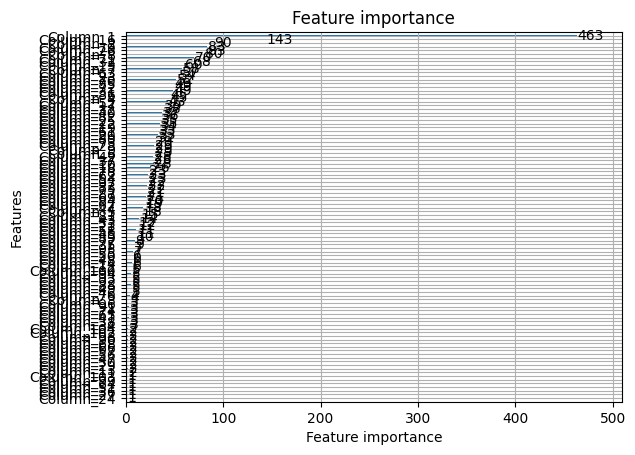

In [39]:
import lightgbm as lgm
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
display(lgm.plot_importance(model4))

# Developing Hybrid Model

In [40]:
# train our base models
model.fit(X_train,Y_train)
model2.fit(X_train,Y_train)
model3.fit(X_train,Y_train)
model4.fit(X_train,Y_train)
model5.fit(X_train,Y_train)
model6.fit(X_train,Y_train)

Learning rate set to 0.056273
0:	learn: 1.1615577	total: 21.6ms	remaining: 21.6s
1:	learn: 1.0989004	total: 34.5ms	remaining: 17.2s
2:	learn: 1.0380477	total: 47.5ms	remaining: 15.8s
3:	learn: 0.9826612	total: 58.4ms	remaining: 14.5s
4:	learn: 0.9295316	total: 70.7ms	remaining: 14.1s
5:	learn: 0.8801453	total: 85.5ms	remaining: 14.2s
6:	learn: 0.8319401	total: 97.5ms	remaining: 13.8s
7:	learn: 0.7859108	total: 112ms	remaining: 13.9s
8:	learn: 0.7434004	total: 122ms	remaining: 13.4s
9:	learn: 0.7029603	total: 134ms	remaining: 13.3s
10:	learn: 0.6650498	total: 147ms	remaining: 13.3s
11:	learn: 0.6294710	total: 158ms	remaining: 13s
12:	learn: 0.5956381	total: 169ms	remaining: 12.8s
13:	learn: 0.5628727	total: 181ms	remaining: 12.7s
14:	learn: 0.5331088	total: 192ms	remaining: 12.6s
15:	learn: 0.5044254	total: 203ms	remaining: 12.5s
16:	learn: 0.4769356	total: 220ms	remaining: 12.7s
17:	learn: 0.4508028	total: 242ms	remaining: 13.2s
18:	learn: 0.4267882	total: 261ms	remaining: 13.5s
19:	le

HistGradientBoostingRegressor()

In [43]:
# Collect predictions from base models on the training data
#pred_train_1 = model.predict(X_train)
pred_train_2 = model2.predict(X_train)
pred_train_3 = model3.predict(X_train)
pred_train_4 = model4.predict(X_train)
pred_train_5 = model5.predict(X_train)
pred_train_6 = model6.predict(X_train)

In [48]:
base_models = [
    ('catboost', CatBoostRegressor(n_estimators=10, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=10, random_state=42)),
    ('HistGradBoost', HistGradientBoostingRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Light GBM', LGBMRegressor())
]

In [44]:
from sklearn.ensemble import StackingRegressor

In [50]:
# Define meta-model
meta_model = AdaBoostRegressor()

In [52]:
# Create the stacked model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

In [53]:
# Train the stacking model
stacked_model.fit(X_train, Y_train)


Learning rate set to 0.5
0:	learn: 0.6482086	total: 139ms	remaining: 1.25s
1:	learn: 0.3332065	total: 167ms	remaining: 669ms
2:	learn: 0.1799383	total: 190ms	remaining: 444ms
3:	learn: 0.1037362	total: 219ms	remaining: 328ms
4:	learn: 0.0659708	total: 269ms	remaining: 269ms
5:	learn: 0.0469852	total: 313ms	remaining: 208ms
6:	learn: 0.0380915	total: 346ms	remaining: 148ms
7:	learn: 0.0328950	total: 371ms	remaining: 92.9ms
8:	learn: 0.0310113	total: 385ms	remaining: 42.8ms
9:	learn: 0.0301573	total: 398ms	remaining: 0us
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26162
[LightGBM] [Info] Number of data points in the train set: 7485, number of used features: 104
[LightGBM] [Info] Start training from score 2.094856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

StackingRegressor(cv=5,
                  estimators=[('catboost',
                               <catboost.core.CatBoostRegressor object at 0x1310ecfa0>),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_po...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=10, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('HistGradBoost',
                               HistGradientBoostingRegressor()),
                              ('Gradient Boosting',
                               GradientBoostingRegressor()),
                              ('Light GBM', LGBMRegressor())],
                  final_estimator=AdaBoostRegressor())

In [54]:
# Make predictions
y_pred = stacked_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(Y_test, y_pred)
print(f'Stacking Model Mean Absolute Error: {mae}')

Stacking Model Mean Absolute Error: 0.0


In [60]:
# Check model Accuracy
print(f"Acuracy : {stacked_model.score(X_test,Y_test)*100}%")

Acuracy : 100.0%
